In [1]:
%pylab inline
np.set_printoptions(precision=10, suppress=True)  
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from sklearn import datasets
import seaborn
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

Populating the interactive namespace from numpy and matplotlib
Automatically created module for IPython interactive environment


In [2]:
iris = datasets.load_iris()

In [3]:
print iris['DESCR']

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [4]:
data = iris['data']

In [5]:
iris

{'DESCR': 'Iris Plants Database\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ====================\n\n

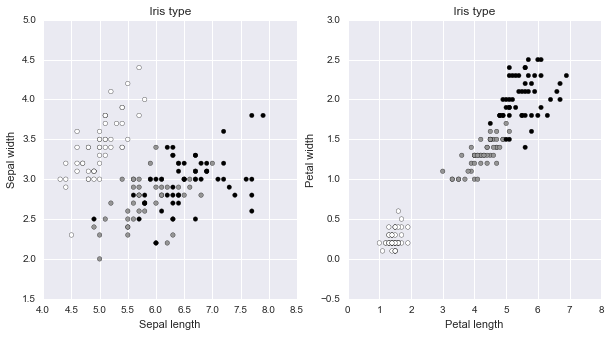

In [6]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

plt.title(" Iris type ")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.scatter(data[:,0], data[:,1], c =iris['target'] )

plt.subplot(1, 2, 2)
plt.scatter(data[:,2], data[:,3], c = iris['target'] )
plt.title(" Iris type ")
plt.xlabel("Petal length")
plt.ylabel("Petal width")


In [7]:
target_names = [ iris['target_names'][target]  for target in iris['target'] ]

#### Считаем матрицу расстояний

http://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html


In [8]:
Z = linkage( data, method='complete', metric='euclidean' )

##### Linkage matrix
Формат
idx1 -- индеск первого кластера
idx2 -- индекс второго
dist -- расстояние  между ними
sample_count -- количество элементов в матрице

О расстоянии
Что вы можете сказать о расстоянии?

О индексах
В итерации 5 алгоритм решил объединить кластера индексами 46 и 153.
Но всего в выборке у нас только 150 элементов. Все индексы больше размера выборки на самом деле относятся к кластеру, образованному на итерации IDX - LEN (X)

Значит на итерации 2 алгоритм объединил 19, 34 и 37 элементы выборки.

Посмотрим на эти элементы.

In [9]:
Z[:10]

array([[   9.          ,   34.          ,    0.          ,    2.          ],
       [  37.          ,  150.          ,    0.          ,    3.          ],
       [ 101.          ,  142.          ,    0.          ,    2.          ],
       [   7.          ,   39.          ,    0.1         ,    2.          ],
       [   0.          ,   17.          ,    0.1         ,    2.          ],
       [ 128.          ,  132.          ,    0.1         ,    2.          ],
       [  10.          ,   48.          ,    0.1         ,    2.          ],
       [  19.          ,   21.          ,    0.1414213562,    2.          ],
       [  29.          ,   30.          ,    0.1414213562,    2.          ],
       [  57.          ,   93.          ,    0.1414213562,    2.          ]])

In [39]:
print data[[9,34, 37]]

[[ 4.9  3.1  1.5  0.1]
 [ 4.9  3.1  1.5  0.1]
 [ 4.9  3.1  1.5  0.1]]


#### Визуализация
 -- горизонтальные линии это смерженные кластера
 -- вертикальные линии указывают на то какие кластера образовали новый кластер
 -- высота горизонтальных линий указывает на расстояние, которое необходимо для создания новых кластеров

Можно заметить, что есть довольно большие скачки между расстояниями(с 2.4 сразу до 4). Это может указывать на то, что объединены кластера, которые не следовало объединять. 

Цвета на дендограмме регулируются параметром color_threshold. 

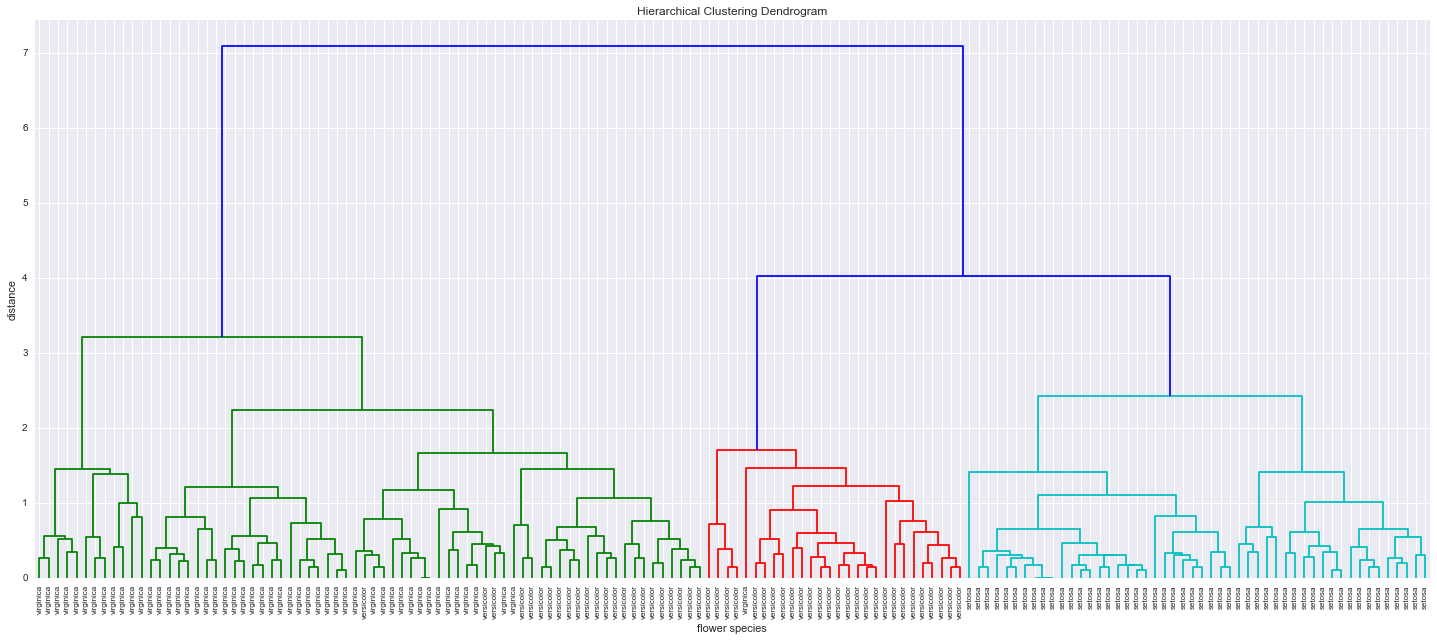

In [22]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('flower species')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., # font size for the x axis labels
    labels = target_names,
    color_threshold = 0.5*max(Z[:,2])
)
plt.show()

#### Truncated dendogram
Почему исчезли лейблы?


show_contracted -- рисует точки на той высоте, где были смержены кластера, которых сейчас нет на дендограме.

show_leaf_counts -- показывает количество элементов в кластере

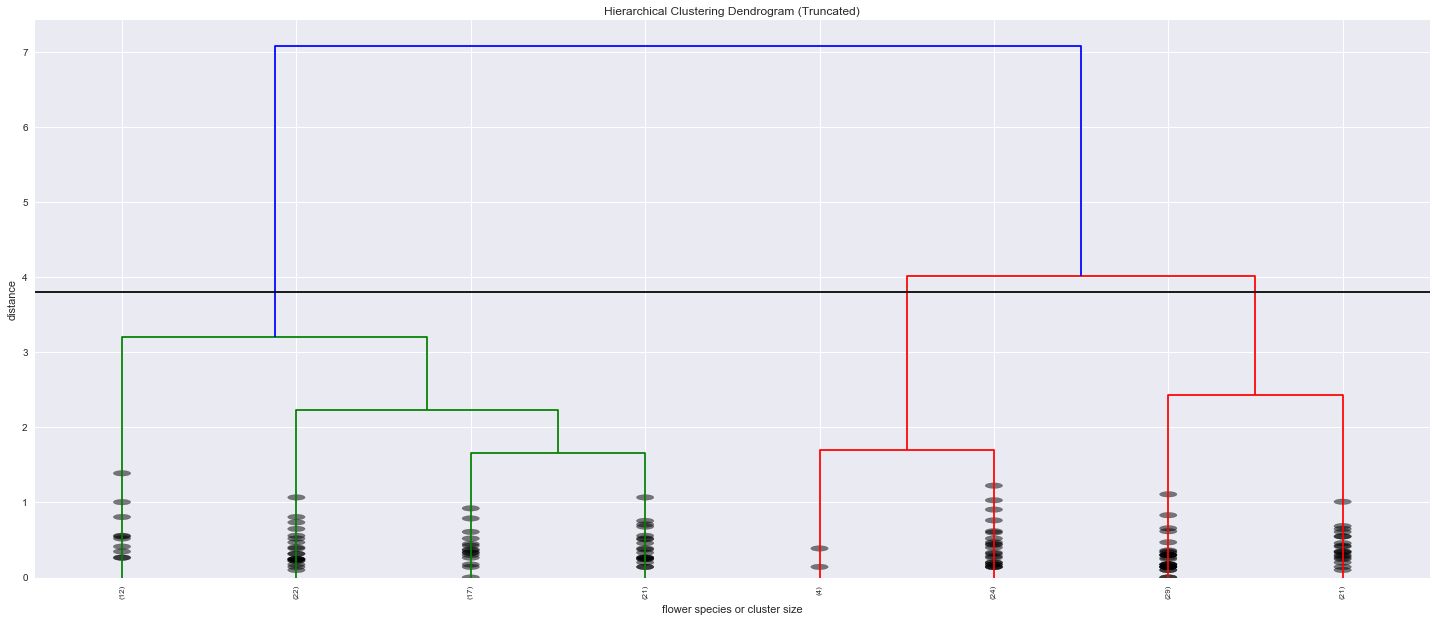

In [24]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.xlabel('flower species or cluster size')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., # font size for the x axis labels
    labels = target_names,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=8,  # show only the last p merged clusters
  #  show_leaf_counts=False,  # otherwise numbers in brackets are counts
    show_contracted=True  # to get a distribution impression in truncated branches

)
plt.axhline(y=3.8, c='k', color='blue') # i added this
plt.show()


### Как определить расстояние, после которого уже не нужно объединять кластера?
Метод локтя

Он пытается найти шаг кластеризации, где ускорение роста расстояний про объединении максимально. 

NameError: name 'last' is not defined

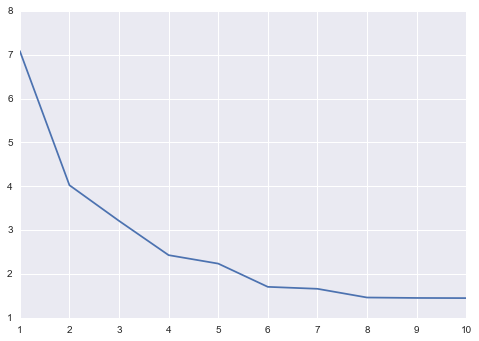

In [25]:
last_merging = Z[-10:, 2]
revert_last_merging = last_merging[::-1]
idxs = np.arange(1, len(last_merging) + 1)
plt.plot(idxs, revert_last_merging)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print "Optimal number of clusters: %d" % k


#### Как получить кластера

In [26]:
from scipy.cluster.hierarchy import fcluster
max_d = 3.9
clusters = fcluster(Z, max_d, criterion='distance')


In [27]:
fcluster?

#### Можно нарисовать кластера

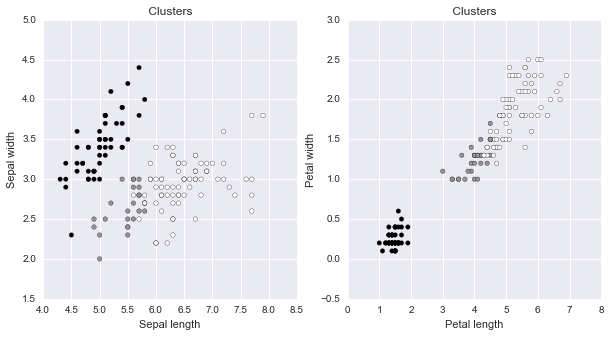

In [28]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

plt.title(" Clusters ")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.scatter(data[:,0], data[:,1],c=clusters)

# plt.subplot(1, 2, 2)
# plt.scatter(data[:,2], data[:,3], c = clusters)
# plt.title(" Clusters ")
# plt.xlabel("Petal length")
# plt.ylabel("Petal width")



In [29]:
db = DBSCAN(eps=0.3, min_samples=10).fit(data)


In [30]:
set(labels)

NameError: name 'labels' is not defined

In [31]:
data[:,[2,3]]

array([[ 1.4,  0.2],
       [ 1.4,  0.2],
       [ 1.3,  0.2],
       [ 1.5,  0.2],
       [ 1.4,  0.2],
       [ 1.7,  0.4],
       [ 1.4,  0.3],
       [ 1.5,  0.2],
       [ 1.4,  0.2],
       [ 1.5,  0.1],
       [ 1.5,  0.2],
       [ 1.6,  0.2],
       [ 1.4,  0.1],
       [ 1.1,  0.1],
       [ 1.2,  0.2],
       [ 1.5,  0.4],
       [ 1.3,  0.4],
       [ 1.4,  0.3],
       [ 1.7,  0.3],
       [ 1.5,  0.3],
       [ 1.7,  0.2],
       [ 1.5,  0.4],
       [ 1. ,  0.2],
       [ 1.7,  0.5],
       [ 1.9,  0.2],
       [ 1.6,  0.2],
       [ 1.6,  0.4],
       [ 1.5,  0.2],
       [ 1.4,  0.2],
       [ 1.6,  0.2],
       [ 1.6,  0.2],
       [ 1.5,  0.4],
       [ 1.5,  0.1],
       [ 1.4,  0.2],
       [ 1.5,  0.1],
       [ 1.2,  0.2],
       [ 1.3,  0.2],
       [ 1.5,  0.1],
       [ 1.3,  0.2],
       [ 1.5,  0.2],
       [ 1.3,  0.3],
       [ 1.3,  0.3],
       [ 1.3,  0.2],
       [ 1.6,  0.6],
       [ 1.9,  0.4],
       [ 1.4,  0.3],
       [ 1.6,  0.2],
       [ 1.4,

Estimated number of clusters: 3


C:\Anaconda2\lib\site-packages\matplotlib\lines.py:1106: UnicodeWarning: Unicode unequal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self._markerfacecolor != fc:


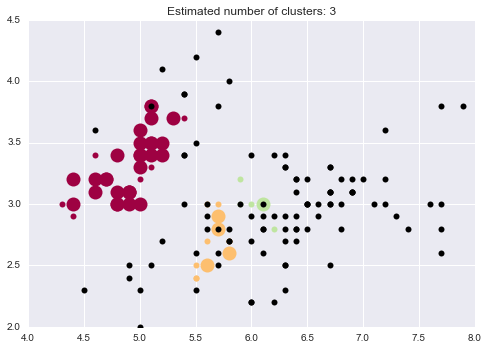

In [32]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=5).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()